In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [50]:
df=pd.read_excel("adolescents_lipidomics_new.xlsx",sheet_name= 'DatawithAssignments')

In [51]:
df1 = df.iloc[1:,7:]
nmp=df1.to_numpy()
print(nmp.shape)
nmp.astype(float)

(991, 84)


array([[0.10897344, 0.04951486, 0.92736722, ..., 0.03614066, 0.22783465,
        0.1616116 ],
       [0.09151078, 0.03247746, 0.54583958, ..., 0.0303714 , 0.18846732,
        0.13387801],
       [0.11308413, 0.04214686, 0.59700313, ..., 0.07342801, 0.16893503,
        0.1003507 ],
       ...,
       [0.15573495, 0.03977705, 0.14008295, ..., 0.13598758, 0.14115383,
        0.18376514],
       [0.29778787, 0.07916505, 0.17131569, ..., 0.17330955, 0.20659814,
        0.19552447],
       [0.23058907, 0.06444064, 0.11719671, ..., 0.0810121 , 0.19250761,
        0.20018485]])

In [52]:
val1 = np.nanmean(nmp, axis=0)
print(val1.shape)

(84,)


In [53]:
print(nmp[243,31])
inval1 = pd.isna(nmp)
print(inval1[243,31])

nan
True


In [54]:
for i in range(nmp.shape[0]):
    for j in range(nmp.shape[1]):
        if inval1[i,j]:
            nmp[i,j] = val1[j]

Standardization

In [55]:
from sklearn.preprocessing import scale
nmp_scaled = scale(nmp)

K-means

In [56]:
estimator1 = KMeans(n_clusters=5)
estimator1.fit(nmp_scaled)
print(estimator1.labels_)
print(estimator1.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0
 0 3 0 3 0 0 3 3 3 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 3 0 0 1 0 1 1 0 1 0 1 3 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 3 0 1 1 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 3 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 3 0 1 0 0 1 1 1 1 0 0 0 3 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 3 1 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 0 1 3 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 1 1 3 1 1 1 0 0 1 1 1 

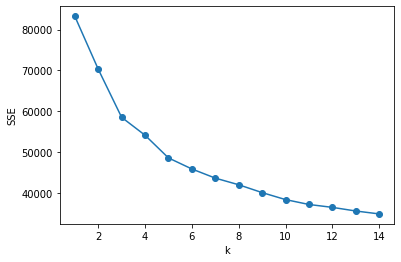

In [57]:
import matplotlib.pyplot as plt
SSE = []  
for k in range(1,15):
    estimator = KMeans(n_clusters=k)
    estimator.fit(nmp_scaled)
    SSE.append(estimator.inertia_)
X = range(1,15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

DBSCAN

In [58]:
estimator2 = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(nmp_scaled)